### Testing for a single sub, (science) getting count of author comments and posts for each month

In [1]:
%load_ext dotenv
%dotenv

import numpy as np
import csv as csv
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import math
import json
from datetime import datetime
import seaborn as sns

from nltk import pos_tag
from nltk.util import pad_sequence
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from termcolor import colored

import praw
import requests
import json
import os
import glob
import calendar

# change the directory to our data directory
os.chdir('../data/test_subs_2017/')
EXPORTING = True

# Author Count Functions
Simple functions for import/export and extracting author counts

In [30]:
### function to return df with author counts for each month
def get_author_counts(df):
    author_counts = df.groupby(['created_month'])['author'].value_counts()
    author_counts = pd.DataFrame(author_counts).reset_index(0)
    author_counts.columns = ['created_month', 'count']

    month_groups = author_counts.groupby('created_month')
    for m, g in month_groups:
        author_counts[m] = g['count']
    
    author_counts = author_counts.fillna(0)
    
    # reset index now since we don't need authors to be an index for joining counts above
    author_counts = author_counts.reset_index()
    
    # also drop all the duplicates + unnecessary cols that this made
    author_counts = author_counts.drop_duplicates(subset=['author'])
    author_counts.drop(['created_month', 'count'], axis=1, inplace=True)
    
    return author_counts

# Import comments and export author counts for a given sub
def export_author_counts(sub, path='../cleaned/', ext='_2017.csv'):
    comments_df_path = path+sub+'_comments'+ext
    print('Importing', colored(comments_df_path, 'magenta'), '.....')
    df = pd.read_csv(comments_df_path)
    print('Extracting author counts.....')
    author_counts = get_author_counts(df)
    if EXPORTING:
        author_count_path = path+sub+'_author_counts'+ext
        print('Exporting ', colored(author_count_path, 'magenta'),'.....')
        author_counts.to_csv(author_count_path)
        print('Done')


    
    

# Author Counts 
Actually running functions on some subreddits

In [29]:
export_author_counts('science')

Importing ../cleaned/science_comments_2017.csv .....


/homes/gws/taugust/miniconda3/envs/reddit/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3191: DtypeWarning: Columns (0,4,8,9,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  if (yield from self.run_code(code, result)):


,Unnamed: 0,word_count,body,score_hidden,archived,name,author,author_flair_text,downs,created_utc,...,score,retrieved_on,controversiality,gilded,id,subreddit,ups,distinguished,author_flair_css_class,created_month
0,154,19.0,He died an early death from the heartbreak of ...,NaN,NaN,NaN,Scientolojesus,NaN,NaN,1503458199,...,7.0,1.504300e+09,0,0,dm00ybf,science,NaN,NaN,NaN,8.0
1,155,35.0,If you have any emotional baggage that you nev...,NaN,NaN,NaN,EvoEpitaph,NaN,NaN,1502645715,...,7.0,1.504024e+09,0,0,dlkg1qf,science,NaN,NaN,NaN,8.0
2,248,115.0,You're getting into awfully dangerous territor...,NaN,NaN,NaN,insertSpork,NaN,NaN,1501605869,...,10.0,1.503673e+09,0,0,dl0ovz5,science,NaN,NaN,NaN,8.0
3,287,29.0,In a way children are picking a puberty no mat...,NaN,NaN,NaN,MichyMc,NaN,NaN,1503037793,...,13.0,1.504165e+09,0,0,dlseo7e,science,NaN,NaN,NaN,8.0
4,414,20.0,Dammit. Stupid OP for posting this. I hadn't n...,NaN,NaN,NaN,Belly318,NaN,NaN,1503551939,...,5.0,1.504333e+09,0,0,dm1upsc,science,NaN,NaN,NaN,8.0
5,415,48.0,"Uh, I did. 22 years old, married two years ago...",NaN,NaN,NaN,wings_like_eagles,NaN,NaN,1502090910,...,5.0,1.503836e+09,0,0,dl9vw4l,science,NaN,NaN,NaN,8.0
6,477,25.0,And that is mostly because women are far more ...,NaN,NaN,NaN,Neuchacho,NaN,NaN,1501605229,...,6.0,1.503673e+09,0,0,dl0o95k,science,NaN,NaN,NaN,8.0
7,478,54.0,&gt; s a bit bizarre to compare theropod and a...,NaN,NaN,NaN,drchris498,NaN,NaN,1502493436,...,6.0,1.503979e+09,0,0,dlhxz7r,science,NaN,NaN,NaN,8.0
8,646,11.0,"More importantly, I think popular opinion gets...",NaN,NaN,NaN,burlyginger,NaN,NaN,1502230247,...,12.0,1.503885e+09,0,0,dlcnniz,science,NaN,NaN,NaN,8.0
9,720,20.0,You only think that because you didn't go. A l...,NaN,NaN,NaN,ergzay,NaN,NaN,1503780228,...,-1.0,1.504406e+09,0,0,dm5zivb,science,NaN,NaN,NaN,8.0


Extracting author counts.....


,author,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0
0,PLOSScienceWednesday,112.0,76.0,131.0,117.0,130.0,104.0,59.0,164.0,72.0,39.0,59.0,0.0
1,AmerChemSocietyAMA,91.0,73.0,83.0,50.0,84.0,77.0,40.0,124.0,31.0,43.0,19.0,14.0
2,drewiepoodle,91.0,102.0,88.0,97.0,101.0,100.0,147.0,76.0,66.0,50.0,28.0,48.0
3,SirT6,82.0,25.0,38.0,70.0,16.0,6.0,38.0,53.0,92.0,105.0,63.0,63.0
4,ocean_warming_AMA,66.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,Steven_Simpson,61.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,OpenAQ_Team,58.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,ZippyDan,57.0,2.0,4.0,0.0,0.0,0.0,0.0,12.0,0.0,12.0,3.0,1.0
8,fsmpastafarian,55.0,25.0,21.0,52.0,102.0,80.0,126.0,4.0,4.0,2.0,18.0,12.0
9,mvea,55.0,46.0,59.0,39.0,81.0,81.0,68.0,112.0,129.0,105.0,97.0,103.0


Exporting  ../cleaned/science_author_counts_2017.csv .....
Done


### seperate posts and comments to just science for the time being - scratch 


### comments

In [ ]:
df_comments_cleaned = pd.read_csv('../cleaned/cleaned_no_mod_comments_2017.csv')
df_comments_science = df_comments_cleaned[df_comments_cleaned['subreddit'] == 'science']
if EXPORTING:
    df_comments_science.to_csv('../cleaned/science_comments_2017.csv')

### posts

In [11]:
df_posts_cleaned = pd.read_csv('../cleaned/cleaned_no_mod_posts_2017.csv')
df_posts_science = df_posts_cleaned[df_posts_cleaned['subreddit'] == 'science']
if EXPORTING:
    df_posts_science.to_csv('../cleaned/science_posts_2017.csv')

In [9]:
df_post_author_count = get_author_counts(df_posts_science)
df_comment_author_count = get_author_counts(df_comments_science)
df_comment_author_count['kind'] = 'comment'
df_post_author_count['kind'] = 'post'
if EXPORTING:
    df_post_author_count.append(df_comment_author_count).to_csv('../cleaned/author_count_science_2017.csv')


(0, 60)

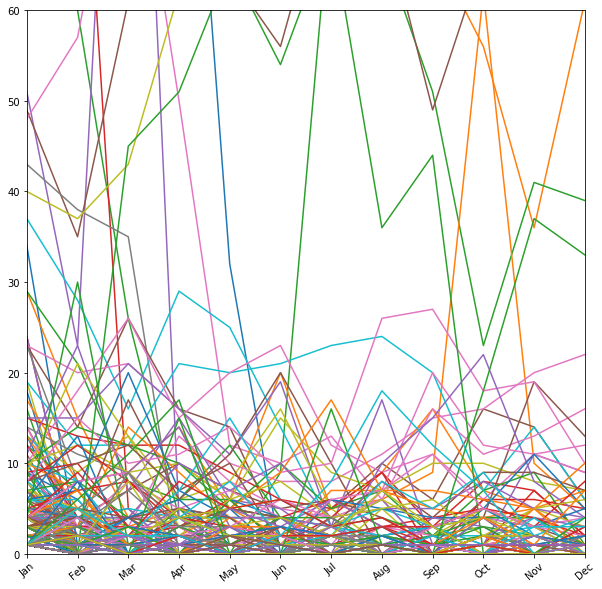

In [87]:
df_post_author_count_T = df_post_author_count.T[1:][list(range(1,1500))].apply(pd.to_numeric, axis=1)
ax = df_post_author_count_T.plot.line(legend=False, figsize=(10,10))
ax.set_xticks(range(1,13))
ax.set_xticklabels(labels=month_list, rotation=40)
ax.set_ylim(0, 60)

In [98]:
df_comment_author_count

,author,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,kind
0,PLOSScienceWednesday,115.0,80.0,153.0,119.0,139.0,116.0,60.0,171.0,73.0,43.0,60.0,0.0,comment
1,drewiepoodle,106.0,116.0,107.0,111.0,124.0,118.0,163.0,87.0,75.0,56.0,32.0,60.0,comment
2,AmerChemSocietyAMA,92.0,75.0,88.0,52.0,89.0,81.0,40.0,144.0,39.0,45.0,19.0,14.0,comment
3,SirT6,91.0,25.0,39.0,81.0,18.0,6.0,40.0,56.0,97.0,111.0,71.0,83.0,comment
4,ZippyDan,66.0,2.0,5.0,0.0,0.0,1.0,2.0,19.0,2.0,14.0,4.0,1.0,comment
5,ocean_warming_AMA,66.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,comment
6,Steven_Simpson,65.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,comment
7,OpenAQ_Team,62.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,comment
8,mutatron,59.0,17.0,36.0,20.0,43.0,66.0,57.0,55.0,17.0,26.0,94.0,59.0,comment
9,NapClub,58.0,17.0,8.0,5.0,2.0,2.0,1.0,2.0,14.0,0.0,0.0,4.0,comment
